In [1]:
%load_ext jupyter_black

### MULTI-RADAR/MULTI-SENSOR SYSTEM (MRMS)

The MRMS system was developed to produce severe weather, transportation, and precipitation products for improved decision-making capability to improve hazardous weather forecasts and warnings, along with hydrology, aviation, and numerical weather prediction.

MRMS is a system with fully-automated algorithms that quickly and intelligently integrate data streams from multiple radars, surface and upper air observations, lightning detection systems, satellite observations, and forecast models. Numerous two-dimensional multiple-sensor products offer assistance for hail, wind, tornado, quantitative precipitation estimations, convection, icing, and turbulence diagnosis.

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
import rasterio as rio

In [3]:
ds: xr.Dataset = xr.open_dataset(
    "/workspaces/sppp/data/grib/MultiSensor_QPE_01H_Pass2_00.00_20220719-000000.grib2",
    engine="cfgrib",
)
ds

<xarray.Dataset>
Dimensions:         (latitude: 3500, longitude: 7000)
Coordinates:
    time            datetime64[ns] ...
    step            timedelta64[ns] ...
    heightAboveSea  float64 ...
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
    valid_time      datetime64[ns] ...
Data variables:
    unknown         (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             161
    GRIB_centreDescription:  161
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             161
    history:                 2022-07-20T00:41 GRIB to CDM+CF via cfgrib-0.9.1...

In [21]:
lat, lon = (ds.coords[x].to_numpy() for x in ("latitude", "longitude"))
lon

array([230.005   , 230.015   , 230.025   , ..., 299.974998, 299.984998,
       299.994998])

In [23]:
# Longitude conversion 0~360 to -180~180
lon = (lon + 180) % 360 - 180
lon

array([-129.995   , -129.985   , -129.975   , ...,  -60.025002,
        -60.015002,  -60.005002])

In [22]:
lat

array([54.995, 54.985, 54.975, ..., 20.025, 20.015, 20.005])

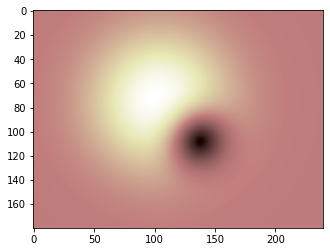

In [61]:
from PIL import Image
import matplotlib.pyplot as plt
import cartopy as ccrs

import rasterio as rio
from rasterio.transform import from_origin
from rasterio.transform import Affine
# this all can be replaced with the dataarray
x = np.linspace(-4.0, 4.0, 240)
y = np.linspace(-3.0, 3.0, 180)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-2 * np.log(2) * ((X - 0.5) ** 2 + (Y - 0.5) ** 2) / 1**2)
Z2 = np.exp(-3 * np.log(2) * ((X + 0.5) ** 2 + (Y + 0.5) ** 2) / 2.5**2)
Z = 10.0 * (Z2 - Z1)
res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)

with rio.open(
    "/tmp/new.tif",
    "w",
    driver="GTiff",
    height=Z.shape[0],
    width=Z.shape[1],
    count=1,
    dtype=Z.dtype,
    crs="+proj=latlong",
    transform=transform,
) as new_dataset:

    new_dataset.write(Z, 1)

# new_dataset.close()

with rio.open("/tmp/new.tif") as src:

    plt.imshow(src.read(1), cmap="pink")

    plt.show()